In [76]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [77]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [78]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [79]:
sdir  = '/data/tjarniko/results/BR_1st_2015/ncs/'
t_ncU = 'SKOG_1d_20150101_20150130_dian_U_20150101-20150101.nc'
t_ncG = 'SKOG_1d_20150101_20150130_grid_T_20150101-20150101.nc'

t_testU = nc.Dataset(sdir+t_ncU)
t_testG = nc.Dataset(sdir+t_ncG)
# print(t_testU)
# print('*')
# print(t_testG)
#print(t_testU['depthu_bounds'][10,:])

In [80]:
TA_UT = t_testU['TA_UT']
DIC_UT = t_testU['DIC_UT']
print(np.shape(TA_UT))

(1, 40, 898, 398)


In [81]:
TA_UT_jdfmouth = TA_UT[:,:,:,5]
print(np.shape(TA_UT_jdfmouth))
TA_UT_jdfmouth2d = np.squeeze(TA_UT_jdfmouth)
print(np.shape(TA_UT_jdfmouth2d))

print(np.sum(TA_UT_jdfmouth2d))


(1, 40, 898)
(40, 898)
1.58447e+08


# What is being calculated?

Code from NEMO:

         IF( iom_use( cltraU )) THEN ! calculate u-dir transport
            z3d(:,:,:) = 0.e0
            DO jk = 1, jpkm1
               DO jj = 2, jpjm1
                  DO ji = 2, jpim1   ! vector opt.
                     z3d(ji,jj,jk) = un(ji,jj,jk) * e2u(ji,jj) * fse3u_n(ji,jj,jk) * &
                        & umask(ji,jj,jk) * ( trn(ji,jj,jk,jn) + trn(ji+1,jj,jk,jn) )
                  END DO
               END DO
            END DO
            CALL lbc_lnk( z3d, 'U', -1. )
            CALL iom_put( cltraU , 0.5 * z3d )
         ENDIF

    What I think the variables are:
    
    ?: un(ji,jj,jk) is velocity? m/s
    
    YES: e2u is grid spacing on u grid in v direction (m)
    
    ? fse3u_n: would this be the depth of the given grid cell? 
                multiplying the above two together would give me an area. 
    
    ? umask(ji,jj,jk): a mask?
    
    trn(ji,jj,jk,jn) + trn(ji+1,jj,jk,jn) - tracer concentration at 2 adjacent i-points. (This explains the 0.5 * z3d)
    (units mmol/m3)
    
    BOE calc of pure value - velocity 2 m/s, grid spacing in v dir 500 m, depth of grid cell 10m, concentration 2000
    gives 20,000,000 mmol/s in a given grid cell. 
    
    

    

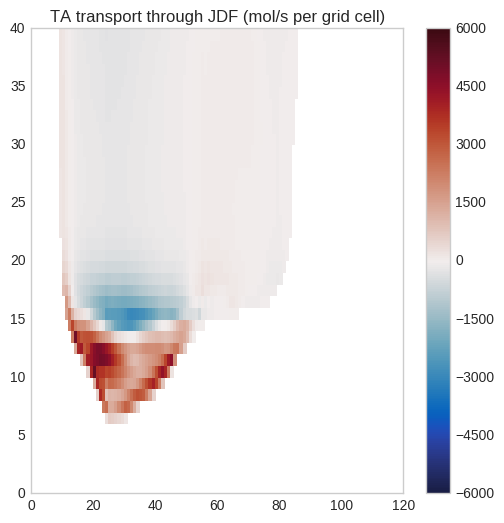

In [82]:

fig = plt.figure(figsize=(6,6))
nop = 1
for i in range(1,nop+1):
    ax = fig.add_subplot(1,1,i)
    sd = np.flipud(TA_UT_jdfmouth2d[:,380:490])/1000
    tplt = np.ma.masked_values(sd,0)
    mesh = ax.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-6000, vmax=6000)
    cbar = fig.colorbar(mesh, ax=ax)
    plt.title('TA transport through JDF (mol/s per grid cell)')

In [83]:
#year with correct 
start = '2015-05-01'
end = '2015-12-31'

st = dt.datetime(2015,5,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)



#PI year
start3 = '2015-05-01'
end3 = '2015-12-31'

st3 = dt.datetime(2015,5,1)
en3 = dt.datetime(2015,12,31)
y_st3 = st3.timetuple().tm_yday
print(y_st3)
y_en3 = en3.timetuple().tm_yday
print(y_en3)
ts_PI = np.arange(y_st3,y_en3+1,1)


bdir = '/results2/SalishSea/hindcast.201812_annex/'
sdir = '/data/tjarniko/results/BR_1st_2015/ncs/'
# sdir2 = '/data/tjarniko/results/BR_2nd_2015/ncs/'
sdir3 = '/data/tjarniko/results/PREIND_1st_2015/ncs/'

thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

figstring = 'BR2015'

121
365
121
365


In [84]:
def make_nclen(start,end,ftype, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'_U_' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        #print(tnc_sens[0])
    return sens_ar

In [85]:
BR_ar = make_nclen(start,end,'dian', sdir)
# BR_ar2 = make_nclen(start2,end2,'dian', sdir2)
# BR_ar2B = make_nclen(start2B,end2B,'dian', sdir2)
PI_ar = make_nclen(start3,end3,'dian', sdir3)


In [86]:
def calculate_transports(files):
    stor_trans = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['DIC_UT'][:,:,:,20]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = np.sum(var_tmp)
        stor_trans[i] = var_tmp2
        i = i+1

    return stor_trans

In [87]:
def calculate_transports_surface(files):
    stor_trans = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['DIC_UT'][:,0:5,:,20]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = np.sum(var_tmp)
        stor_trans[i] = var_tmp2
        i = i+1

    return stor_trans

In [88]:
stor_transBR = calculate_transports(BR_ar)
stor_transPI = calculate_transports(PI_ar)

stor_transBR_surf5 = calculate_transports_surface(BR_ar)
stor_transPI_surf5 = calculate_transports_surface(PI_ar)

0


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


50
100
150
200
0
50
100
150
200
0
50
100
150
200
0
50
100
150
200


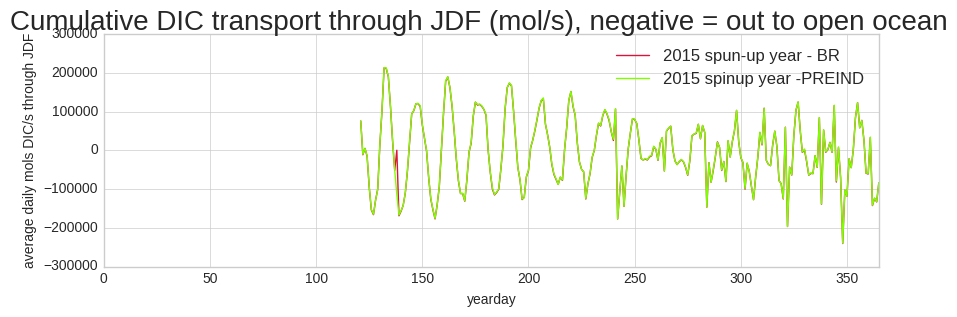

-757655.42
-697397.184


In [95]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR,stor_transBR/1000,color = 'crimson',label = '2015 spun-up year - BR')
ax.plot(ts_PI,stor_transPI/1000,color = 'chartreuse', label = '2015 spinup year -PREIND')
ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([0,365])
#plt.ylim([10000,12000])
fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()

print(sum(stor_transBR/1000))
print(sum(stor_transPI/1000))


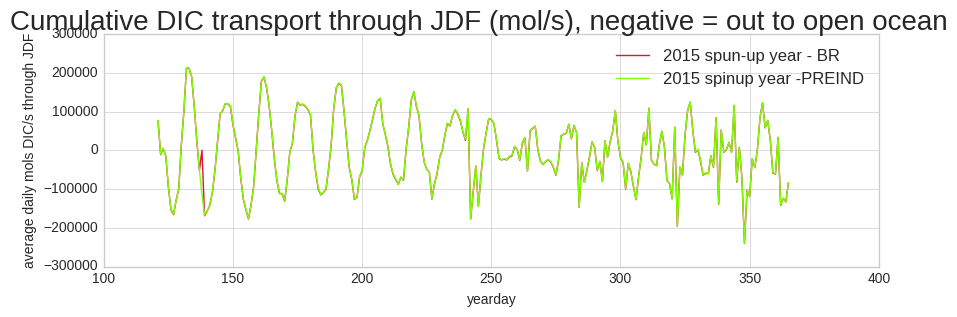

-757655.42
-697397.184


In [102]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR,stor_transBR/1000,color = 'crimson',label = '2015 spun-up year - BR')
ax.plot(ts_PI,stor_transPI/1000,color = 'chartreuse', label = '2015 spinup year -PREIND')
ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
# plt.xlim([250,255])
# plt.ylim([8000,10000])
fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()

print(sum(stor_transBR/1000))
print(sum(stor_transPI/1000))


In [107]:
print(np.sum((stor_transBR[50:245]/1000) - (stor_transPI[50:245]/1000)))
print(np.sum((stor_transBR/1000) - (stor_transPI/1000)))

-131953.988
-60258.236


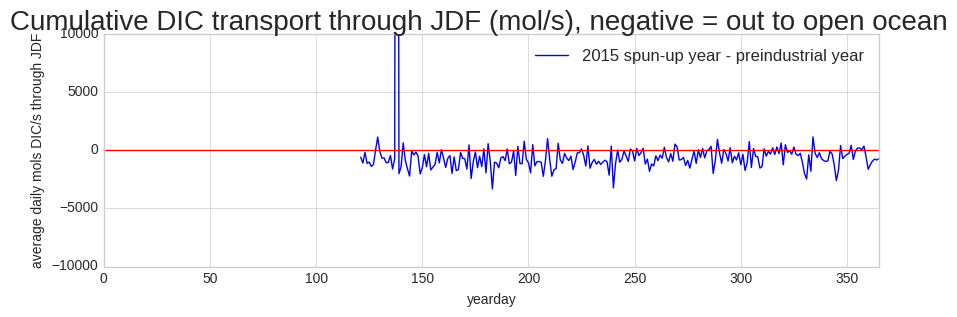

In [90]:
x = [0,365]
y = [0,0]
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR,(stor_transBR/1000) - (stor_transPI/1000) ,color = 'blue',label = '2015 spun-up year - preindustrial year')
#ax.plot(ts_PI,stor_transPI/1000,color = 'chartreuse', label = '2015 spinup year -PREIND')
ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([0,365])
plt.ylim([-10000,10000])
plt.plot(x,y,'red')
fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()

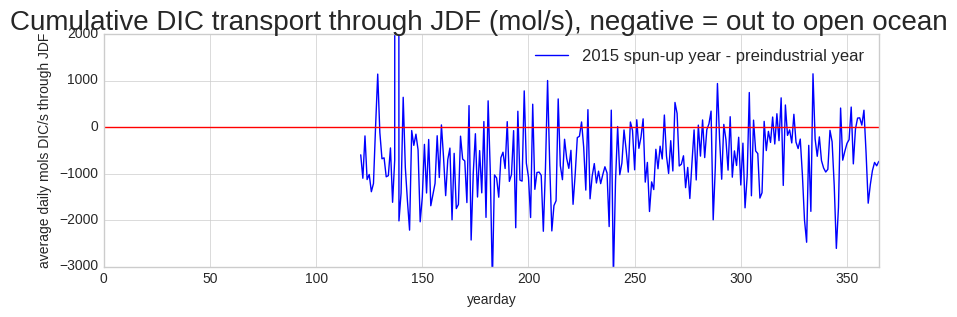

In [91]:
x = [0,365]
y = [0,0]
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR,(stor_transBR/1000) - (stor_transPI/1000) ,color = 'blue',label = '2015 spun-up year - preindustrial year')
#ax.plot(ts_PI,stor_transPI/1000,color = 'chartreuse', label = '2015 spinup year -PREIND')
ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([0,365])
plt.ylim([-3000,2000])
plt.plot(x,y,'red')
fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()